In [56]:
import pandas as pd #Import Pandas dengan alias pd
data = [1,2,3]
df = pd.DataFrame(data) #Mengubah list menjadi dataframe
df

student = [['Tom', 90], ['Jack', 80], ['Jill', 70]] #Buat 2D list untuk 2 Column
data_student = pd.DataFrame(student, columns=['Name', 'Grade']) #'Name' , 'Grade' Adalah Column header
data_student
data_student['Name']

new_student = [['Sam', 60], ['Mary', 50], ['John', 40], ['Joseph', 30]]
new_student = pd.DataFrame(new_student, columns=['Name', 'Grade'])
data_student = pd.concat([data_student, new_student], ignore_index=True)#menggabungkan 2 dataframe 
data_student 
data_student.head(3)
data_student.tail(4)

data_student.to_csv('data_student.csv')

# pandas :
Library digunakan untuk mengelola data dalam bentuk tabel (dataframe)
# seaborn :
Library ini juga untuk visualisasi data, terutama untuk membuat scatter plot.

In [57]:
import numpy as np 
import seaborn as sns

iris_data = pd.read_csv('IRIS.csv') #baca file CSV (comma separated values)
iris_data 

colums_name =  ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class']
iris_data.columns = colums_name #Menambahkan judul kolom ke iris_data
iris_data.head()#Print 5 baris teratas pada data frame.

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
class           0
dtype: int64

In [59]:
iris_data.value_counts("class")

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

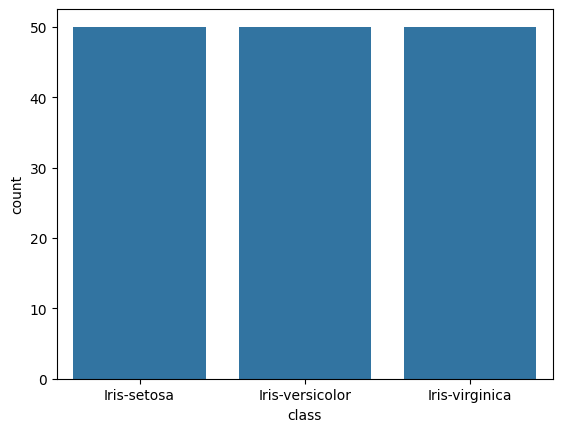

In [60]:
sns.countplot(x='class', data=iris_data ) #Menghitung jumlah data per class , class sebagai sumbu x 

[Text(0.5, 1.0, 'Sepal Length and Sepal Width')]

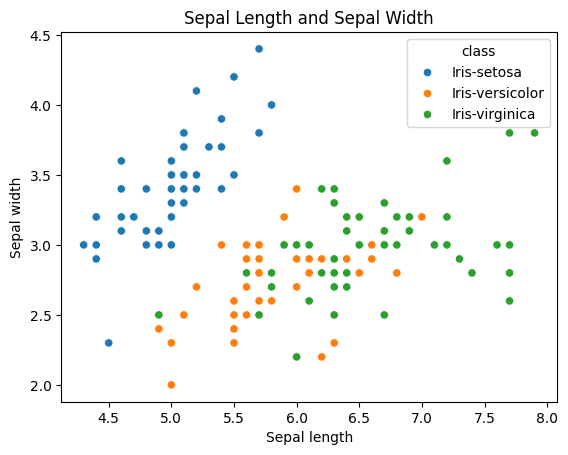

In [61]:
fig1 = sns.scatterplot(x='Sepal length', y='Sepal width',hue='class', data=iris_data)
fig1.set(title='Sepal Length and Sepal Width')

In [62]:
features = iris_data.iloc[:, 0:4] #memilih semua data pada kolom sepal length, sepal width, petal length, petal width untuk disimpan pada features. 
label = iris_data.iloc[:, 4] #Memilih data pada kolom label untuk disimpan pada label.
print("Features : " )
print(features)
print("Label  : ")
print(label)

Features : 
     Sepal length  Sepal width  Petal length  Petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Label  : 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Len

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=0) 
print('Jumlah data train' ,X_train.shape[0])
print('Jumlah data test', y_test.shape[0])

Jumlah data train 120
Jumlah data test 30


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights="uniform") # Dijelaskan di bagian (A)

knn.fit(X_train, y_train) # Dijelaskan di bagian (B)

train_acc = knn.score(X_train, y_train) # Dijelaskan di bagian (C)

print("The accuracy Of KNN classifier on training data is :  {:.3f}".format(train_acc))

The accuracy Of KNN classifier on training data is :  0.950


In [65]:
knn_test_acc = knn.score(X_test, y_test)
print("The accuracy Of KNN classifier on test data is :  {:.3f}".format(knn_test_acc))

The accuracy Of KNN classifier on test data is :  0.967


Text(0.5, 1.0, 'Confusion Matrix')

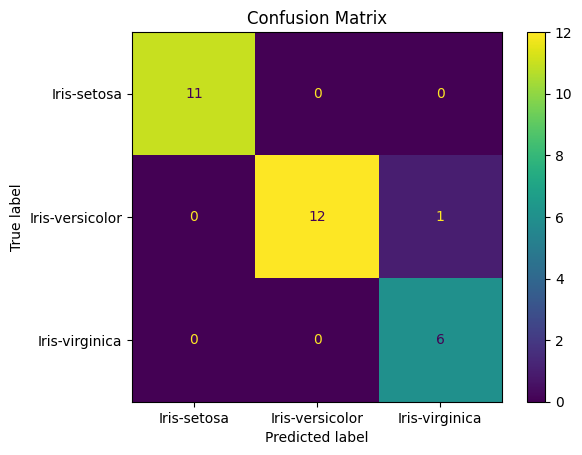

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test
,y_test)
disp.ax_.set_title("Confusion Matrix")

In [67]:
from subprocess import check_output
from sklearn import tree      
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
data = pd.read_csv('IRIS.csv')
features = data.iloc[:, 0:4]
label= data.iloc[:, 4]

In [69]:
from sklearn.neighbors import KNeighborsClassifier
n_range = list(range(1,10))# a
weight_list = ["uniform","distance"] #b
param_grid = {"n_neighbors": n_range, "weights":weight_list}   # c     
grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = param_grid, 
                    cv = 3,  #                   d
                    scoring = 'accuracy', 
                    refit = True)  
knn_model = make_pipeline(preprocessing.StandardScaler(), grid) #e
knn_model.fit(features, label)      
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_) #f

Accuracy of the tuned model: 0.9733
{'n_neighbors': 7, 'weights': 'distance'}


In [70]:
import pickle
with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn_model, f)

In [71]:
# Load the model
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)
# Predict new data
new_data =[5.1,3.5,1.4,0.2] #Nilai sepal length, width,  petal length dan width berturut-turut yang akan diprediksi labelnya.
X= np.array([new_data])
prediction = model.predict(X) #Melalukan prediksi data
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa']


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
